In [ ]:
import torch
import torchvision
from torchvision import transforms
import tensorflow as tf
from torchvision.models import resnet18
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import time

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Files already downloaded and verified


In [ ]:
def inference(model, dataloader):
    start = time.time()
    for images, labels in dataloader:
        outputs = model(images)
    end = time.time()
    return end - start

In [ ]:
# ResNet model
model = resnet18(pretrained=True)
model.eval()

inference_times_resnet = []
inference_time_without_optimization_resnet18 = inference(model, test_loader)
print("Inference time without optimization:", inference_time_without_optimization_resnet18)
inference_times_resnet.append(inference_time_without_optimization_resnet18)

quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)
inference_time_with_low_res_quant_resnet18 = inference(quantized_model, test_loader)
print("Inference time with low-resolution quantification:", inference_time_with_low_res_quant_resnet18)
inference_times_resnet.append(inference_time_with_low_res_quant_resnet18)

scripted_model = torch.jit.script(model)
inference_time_with_torch_resnet18 = inference(scripted_model, test_loader)
print("Inference time with TorchScript:", inference_time_with_torch_resnet18)
inference_times_resnet.append(inference_time_with_torch_resnet18)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inference time without optimization: 36.536763191223145
Inference time with low-resolution quantification: 27.15228819847107
Inference time with TorchScript: 30.311244249343872


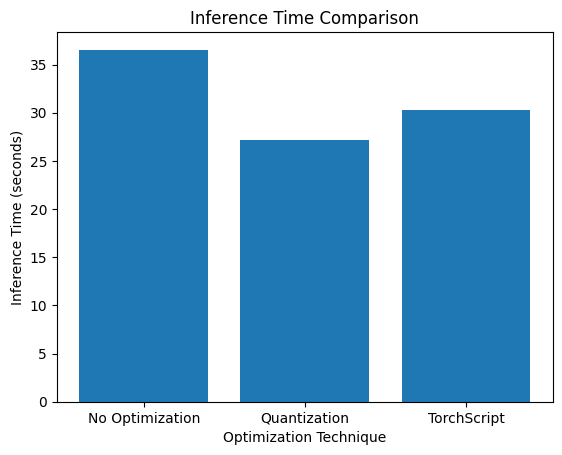

In [ ]:
import matplotlib.pyplot as plt
optimization_techniques = ['No Optimization', 'Quantization', 'TorchScript']
plt.bar(optimization_techniques, inference_times_resnet)
plt.xlabel('Optimization Technique')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time Comparison')
plt.show()

In [ ]:
import torch
import torchvision
from torchvision.models import densenet121
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import time


model = densenet121(pretrained=True)
model.eval()

inference_times_dense = []
inference_time_without_optimization_dense = inference(model, test_loader)
print("Inference time without optimization:", inference_time_without_optimization_dense)
inference_times_dense.append(inference_time_without_optimization_dense)

quantized_model = torch.quantization.quantize_dynamic(
    model, {torch.nn.Linear}, dtype=torch.qint8
)
inference_time_with_low_res_quant_dense = inference(quantized_model, test_loader)
print("Inference time with low-resolution quantification:", inference_time_with_low_res_quant_dense)
inference_times_dense.append(inference_time_with_low_res_quant_dense)


scripted_model = torch.jit.script(model)
inference_time_with_torch_dense = inference(scripted_model, test_loader)
print("Inference time with TorchScript:", inference_time_with_torch_dense)
inference_times_dense.append(inference_time_with_torch_dense)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Inference time without optimization: 46.42129182815552
Inference time with low-resolution quantification: 46.32608246803284
Inference time with TorchScript: 45.29326057434082


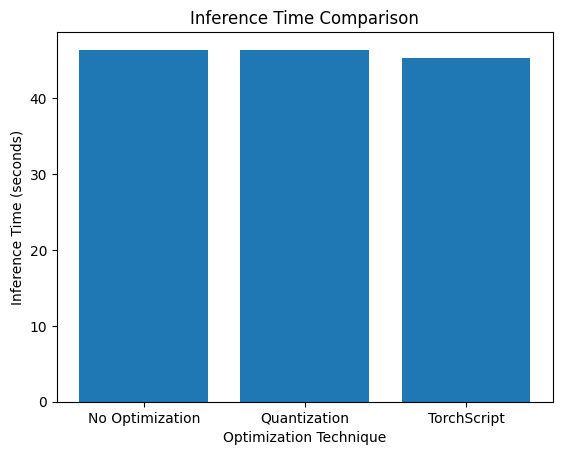

In [ ]:
optimization_techniques = ['No Optimization', 'Quantization', 'TorchScript']
plt.bar(optimization_techniques, inference_times_dense)
plt.xlabel('Optimization Technique')
plt.ylabel('Inference Time (seconds)')
plt.title('Inference Time Comparison')
plt.show()

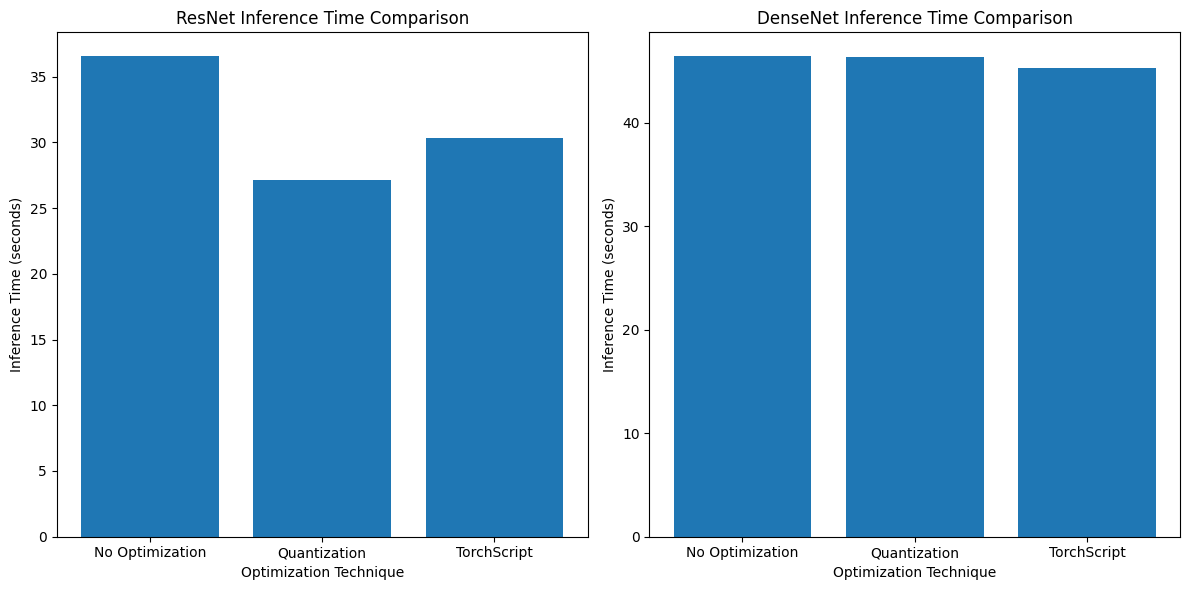

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for ResNet
axes[0].bar(optimization_techniques, inference_times_resnet)
axes[0].set_xlabel('Optimization Technique')
axes[0].set_ylabel('Inference Time (seconds)')
axes[0].set_title('ResNet Inference Time Comparison')

# Plot for DenseNet
axes[1].bar(optimization_techniques, inference_times_dense)
axes[1].set_xlabel('Optimization Technique')
axes[1].set_ylabel('Inference Time (seconds)')
axes[1].set_title('DenseNet Inference Time Comparison')

plt.tight_layout()
plt.show()

100%|██████████| 170498071/170498071 [00:03<00:00, 51959704.76it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 106MB/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lea

Inference time without optimization: 25.012734174728394
Inference time with low-resolution quantification: 25.636595964431763
Inference time with TorchScript: 24.14025616645813


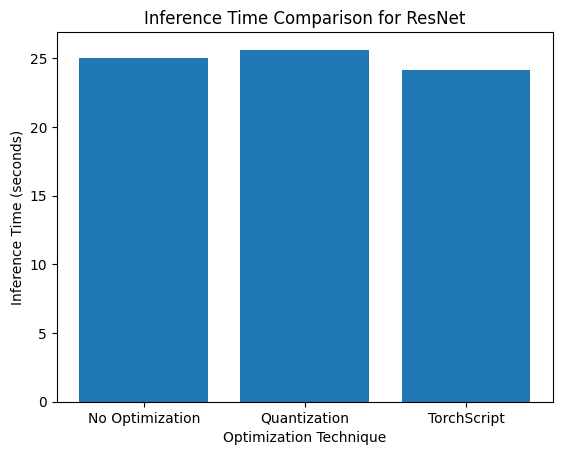

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 131MB/s]


Inference time without optimization: 44.58396935462952
Inference time with low-resolution quantification: 41.18479323387146
Inference time with TorchScript: 41.593021631240845


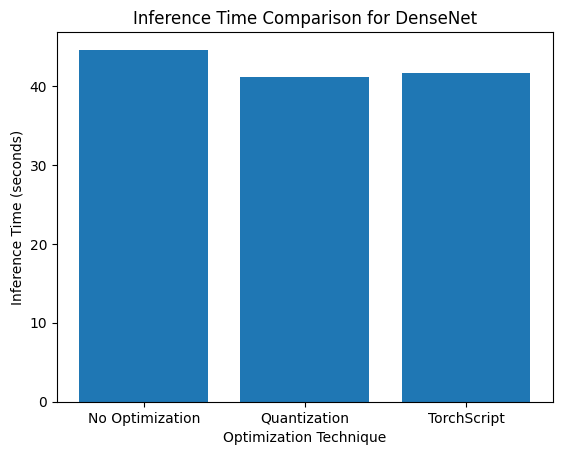

In [ ]:
import torch
import torchvision
from torchvision.models import resnet18, densenet121
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
import time
import matplotlib.pyplot as plt

def get_test_loader():
    transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)
    return test_loader

def inference(model, dataloader):
    start = time.time()
    for images, labels in dataloader:
        outputs = model(images)
    end = time.time()
    return end - start

def run_inference(model, test_loader):
    inference_times = []

    # Inference without optimization
    inference_time_without_optimization = inference(model, test_loader)
    print("Inference time without optimization:", inference_time_without_optimization)
    inference_times.append(inference_time_without_optimization)

    # Quantization
    quantized_model = torch.quantization.quantize_dynamic(
        model, {torch.nn.Linear}, dtype=torch.qint8
    )
    inference_time_with_low_res_quant = inference(quantized_model, test_loader)
    print("Inference time with low-resolution quantification:", inference_time_with_low_res_quant)
    inference_times.append(inference_time_with_low_res_quant)

    # TorchScript
    scripted_model = torch.jit.script(model)
    inference_time_with_torch = inference(scripted_model, test_loader)
    print("Inference time with TorchScript:", inference_time_with_torch)
    inference_times.append(inference_time_with_torch)

    return inference_times

def plot_comparison(inference_times, model_name):
    optimization_techniques = ['No Optimization', 'Quantization', 'TorchScript']
    plt.bar(optimization_techniques, inference_times)
    plt.xlabel('Optimization Technique')
    plt.ylabel('Inference Time (seconds)')
    plt.title(f'Inference Time Comparison for {model_name}')
    plt.show()

def main():
    test_loader = get_test_loader()

    # ResNet
    resnet_model = resnet18(pretrained=True)
    resnet_model.eval()
    inference_times_resnet = run_inference(resnet_model, test_loader)
    plot_comparison(inference_times_resnet, 'ResNet')

    # DenseNet
    densenet_model = densenet121(pretrained=True)
    densenet_model.eval()
    inference_times_dense = run_inference(densenet_model, test_loader)
    plot_comparison(inference_times_dense, 'DenseNet')

if __name__ == "__main__":
    main()
